In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import *
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from collections import Counter
from imblearn.over_sampling import SMOTE

In [2]:
# Import dataset dari CSV dan mentransformasi data menjadi Dataframe Pandas
data = pd.read_csv('./dataset acak.csv')
#menampilkan 5 data teratas
data.head(50)

,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Kondisi
0,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,Normal
1,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,Less,Normal
2,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,More,Vandalisme
3,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,Less,NoData,Normal
4,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,More,NoData,Vandalisme
5,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,Less,Less,GempaTidakMerusak
6,NoData,NoData,NoData,NoData,NoData,NoData,NoData,NoData,More,More,GempaMerusak
7,NoData,NoData,NoData,NoData,NoData,NoData,NoData,Less,NoData,NoData,Normal
8,NoData,NoData,NoData,NoData,NoData,NoData,NoData,Less,NoData,Less,GempaTidakMerusak
9,NoData,NoData,NoData,NoData,NoData,NoData,NoData,Less,Less,NoData,GempaTidakMerusak


In [3]:
# Konversi tiap value kedalam bentuk numerik
data.loc[data['Sensor1'] == 'NoData', 'Sensor1'] = 0
data.loc[data['Sensor1'] == 'Less', 'Sensor1'] = 1
data.loc[data['Sensor1'] == 'More', 'Sensor1'] = 2

data.loc[data['Sensor2'] == 'NoData', 'Sensor2'] = 0
data.loc[data['Sensor2'] == 'Less', 'Sensor2'] = 1
data.loc[data['Sensor2'] == 'More', 'Sensor2'] = 2

data.loc[data['Sensor3'] == 'NoData', 'Sensor3'] = 0
data.loc[data['Sensor3'] == 'Less', 'Sensor3'] = 1
data.loc[data['Sensor3'] == 'More', 'Sensor3'] = 2

data.loc[data['Sensor4'] == 'NoData', 'Sensor4'] = 0
data.loc[data['Sensor4'] == 'Less', 'Sensor4'] = 1
data.loc[data['Sensor4'] == 'More', 'Sensor4'] = 2

data.loc[data['Sensor5'] == 'NoData', 'Sensor5'] = 0
data.loc[data['Sensor5'] == 'Less', 'Sensor5'] = 1
data.loc[data['Sensor5'] == 'More', 'Sensor5'] = 2

data.loc[data['Sensor6'] == 'NoData', 'Sensor6'] = 0
data.loc[data['Sensor6'] == 'Less', 'Sensor6'] = 1
data.loc[data['Sensor6'] == 'More', 'Sensor6'] = 2

data.loc[data['Sensor7'] == 'NoData', 'Sensor7'] = 0
data.loc[data['Sensor7'] == 'Less', 'Sensor7'] = 1
data.loc[data['Sensor7'] == 'More', 'Sensor7'] = 2

data.loc[data['Sensor8'] == 'NoData', 'Sensor8'] = 0
data.loc[data['Sensor8'] == 'Less', 'Sensor8'] = 1
data.loc[data['Sensor8'] == 'More', 'Sensor8'] = 2

data.loc[data['Sensor9'] == 'NoData', 'Sensor9'] = 0
data.loc[data['Sensor9'] == 'Less', 'Sensor9'] = 1
data.loc[data['Sensor9'] == 'More', 'Sensor9'] = 2

data.loc[data['Sensor10'] == 'NoData', 'Sensor10'] = 0
data.loc[data['Sensor10'] == 'Less', 'Sensor10'] = 1
data.loc[data['Sensor10'] == 'More', 'Sensor10'] = 2

data.loc[data['Kondisi'] == 'Vandalisme', 'Kondisi'] = 3
data.loc[data['Kondisi'] == 'Normal', 'Kondisi'] = 0
data.loc[data['Kondisi'] == 'GempaTidakMerusak', 'Kondisi'] = 1
data.loc[data['Kondisi'] == 'GempaMerusak', 'Kondisi'] = 2

data = data.apply(pd.to_numeric, errors='coerce')
data.head(30)

,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10,Kondisi
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,2,3
3,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,2,0,3
5,0,0,0,0,0,0,0,0,1,1,1
6,0,0,0,0,0,0,0,0,2,2,2
7,0,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,1,0,1,1
9,0,0,0,0,0,0,0,1,1,0,1


In [4]:
#Jumlah data tiap sampel kolom kondisi
data.Kondisi.value_counts()

2    52905
1     6033
0       11
3       10
Name: Kondisi, dtype: int64

In [5]:
#Membagi dataset menjadi data latih dan data uji
X = data.iloc[:, 0:10].values  # Independent Feature
y = data.iloc[:, -1].values     # Dependent Feature
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X,y)

In [6]:
print("Before SMOTE y_train :" , Counter(y))
print("After SMOTE y_train :" , Counter(y_train_smote))

Before SMOTE y_train : Counter({2: 52905, 1: 6033, 0: 11, 3: 10})
After SMOTE y_train : Counter({0: 52905, 3: 52905, 1: 52905, 2: 52905})


In [7]:
 test = data.loc[(data['Kondisi']== 1) & (data['Sensor10']==0)]
len(test)

2725

In [8]:
len(y_train_smote) 

 
filter_list = []
sensor = 7
val_sensor = 2
val_kondisi = 3
for i, y in enumerate(y_train_smote): 
    if y == val_kondisi:
        if X_train_smote[i][sensor-1] == val_sensor :
            filter_list.append([X_train_smote[i], y])
print(len(filter_list))
filter_list

1


[[array([0, 0, 0, 0, 0, 0, 2, 0, 0, 0], dtype=int64), 3]]

In [9]:
print(sorted(Counter(y_train_smote).items()),y_train_smote.shape)

[(0, 52905), (1, 52905), (2, 52905), (3, 52905)] (211620,)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_train_smote, y_train_smote, test_size = 0.2, random_state = 0)

In [31]:
#Random Forest Classifier
model = RandomForestClassifier (n_estimators= 10, random_state=0)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [32]:
mymodel=model.fit(X_train,y_train)

In [33]:
mymodel.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=209652396),
 DecisionTreeClassifier(max_features='auto', random_state=398764591),
 DecisionTreeClassifier(max_features='auto', random_state=924231285),
 DecisionTreeClassifier(max_features='auto', random_state=1478610112),
 DecisionTreeClassifier(max_features='auto', random_state=441365315),
 DecisionTreeClassifier(max_features='auto', random_state=1537364731),
 DecisionTreeClassifier(max_features='auto', random_state=192771779),
 DecisionTreeClassifier(max_features='auto', random_state=1491434855),
 DecisionTreeClassifier(max_features='auto', random_state=1819583497),
 DecisionTreeClassifier(max_features='auto', random_state=530702035)]

In [34]:
len(mymodel.estimators_)

10

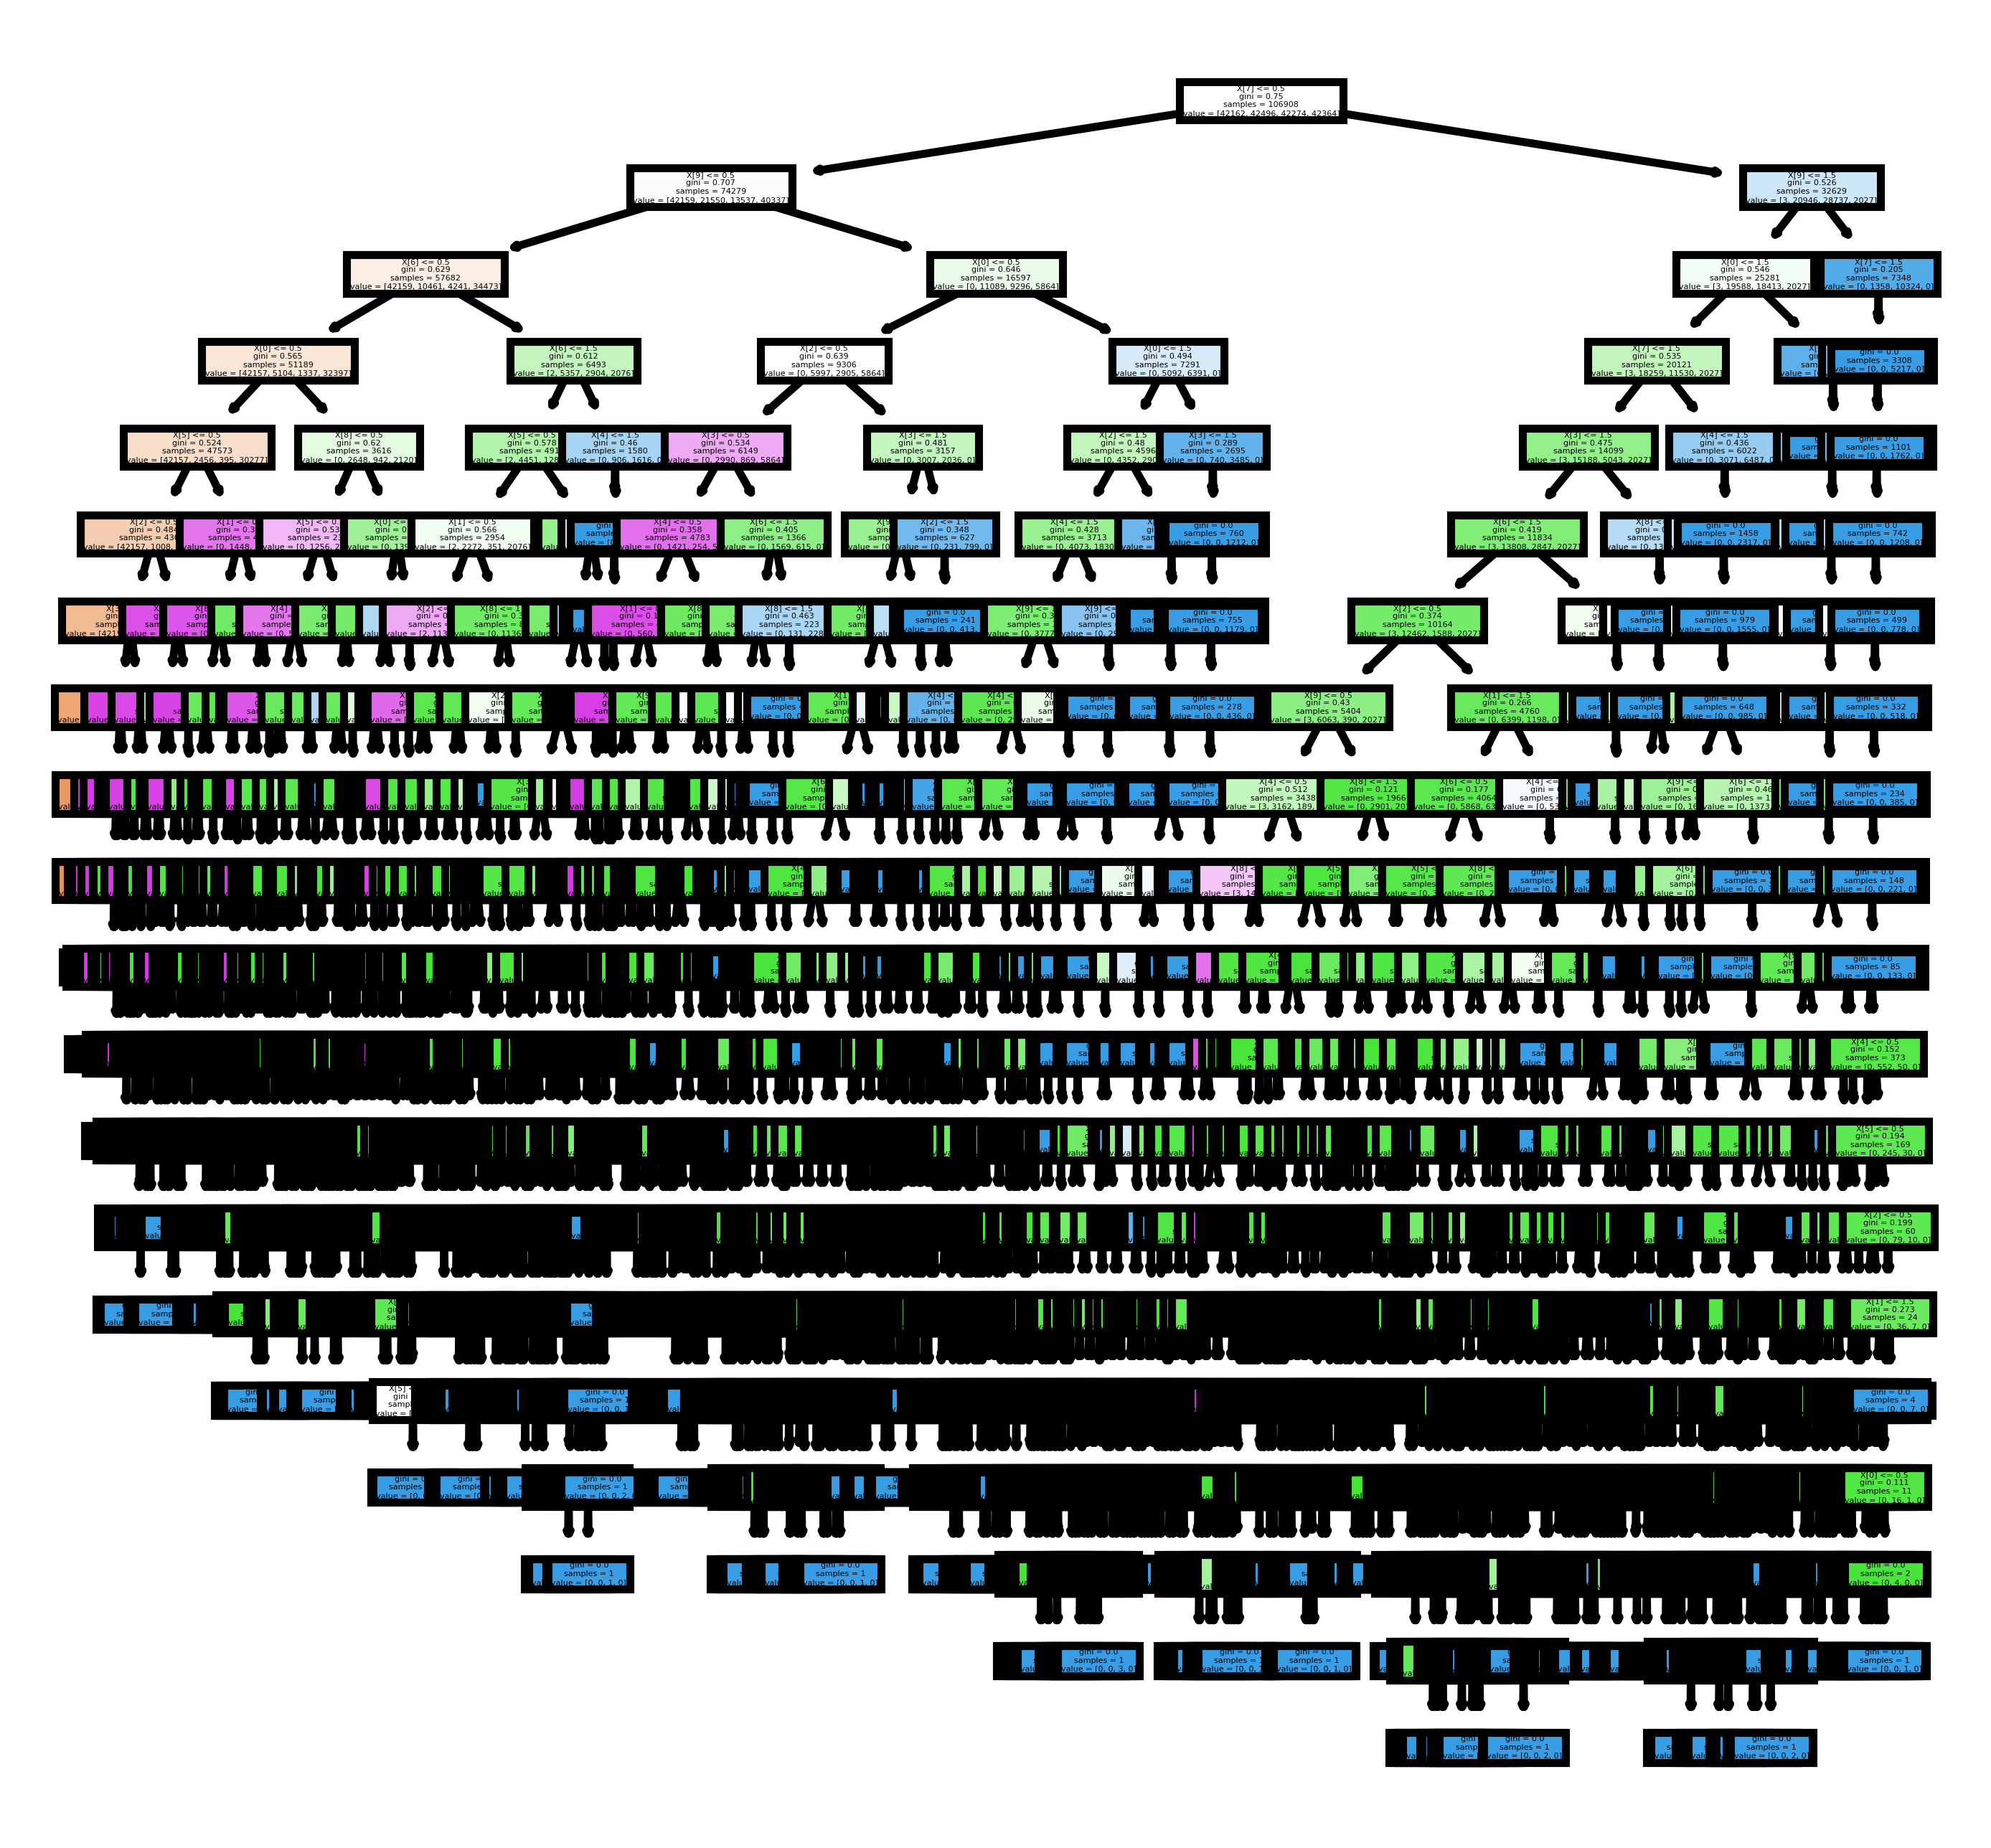

In [39]:
# plt.figure(figsize=(25,20))
# tree.plot_tree(mymodel.estimators_[1],filled=True)
import os
fig, axes = plt.subplots(nrows = 1, ncols= 1, figsize=(4,4), dpi=800)
# tree_data = tree.export_graphviz(mymodel.estimators_[1],filled=True)
tree.plot_tree(mymodel.estimators_[3],filled=True)
fig.savefig('Pohon4.png')
# os.system('dot -T png tree.dot -o tree.png')


In [16]:
y_pred = mymodel.predict(X_test)

In [17]:
akurasi = 100 * accuracy_score(y_test, y_pred)

In [18]:
print("akurasi dari random forest = " + str(akurasi))

akurasi dari random forest = 99.08326245156412


In [19]:
#Confusion matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10509
           1       0.97      1.00      0.98     10701
           2       1.00      0.96      0.98     10553
           3       1.00      1.00      1.00     10561

    accuracy                           0.99     42324
   macro avg       0.99      0.99      0.99     42324
weighted avg       0.99      0.99      0.99     42324



In [20]:
from sklearn.metrics import multilabel_confusion_matrix

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
cm

array([[10509,     0,     0,     0],
       [    0, 10701,     0,     0],
       [    0,   386, 10167,     0],
       [    0,     2,     0, 10559]], dtype=int64)

In [22]:
multilabel=multilabel_confusion_matrix(y_test,y_pred)
print(multilabel)

[[[31815     0]
  [    0 10509]]

 [[31235   388]
  [    0 10701]]

 [[31771     0]
  [  386 10167]]

 [[31763     0]
  [    2 10559]]]


Text(0, 0.5, 'target')

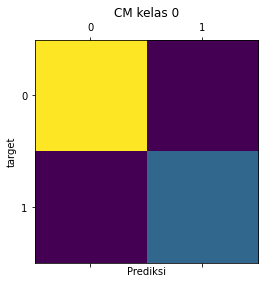

In [23]:
plt.matshow(multilabel[0])
plt.title('CM kelas 0')
plt.xlabel('Prediksi')
plt.ylabel('target')

[[10509     0     0     0]
 [    0 10701     0     0]
 [    0   386 10167     0]
 [    0     2     0 10559]]


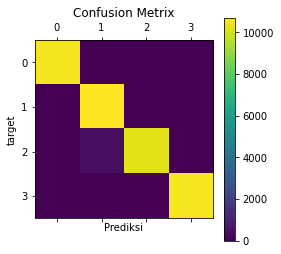

In [24]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
plt.matshow(cm)
plt.title('Confusion Metrix')
plt.xlabel('Prediksi')
plt.ylabel('target')
plt.colorbar()

In [25]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [26]:
precision=precision_score(y_test,y_pred,average=None)
recall=recall_score(y_test,y_pred,average=None)
print('precision',precision, 'rata-rata',np.average(precision))
print('recal',recall, 'rata-rata',np.average(recall))

precision [1.         0.96501037 1.         1.        ] rata-rata 0.9912525926593923
recal [1.         1.         0.96342272 0.99981062] rata-rata 0.9908083368475327


In [27]:
precision=precision_score(y_test,y_pred,average='macro')
recall=recall_score(y_test,y_pred,average='macro')
print('precision',precision)
print('recal',recall)

precision 0.9912525926593923
recal 0.9908083368475327


In [28]:
precision=precision_score(y_test,y_pred,average='micro')
recall=recall_score(y_test,y_pred,average='micro')
print('precision',precision)
print('recal',recall)

precision 0.9908326245156412
recal 0.9908326245156412


In [29]:
multilabel=multilabel_confusion_matrix(y_test,y_pred)
print(multilabel)

[[[31815     0]
  [    0 10509]]

 [[31235   388]
  [    0 10701]]

 [[31771     0]
  [  386 10167]]

 [[31763     0]
  [    2 10559]]]


In [30]:
TPtotal=10509+10701+10550+10560
FPtotal=0+4+0+0
FNtotal=0+0+3+1
prec=TPtotal/(TPtotal+FPtotal)
rec=TPtotal/(TPtotal+FNtotal)
print(prec,rec)

0.9999054909743881 0.9999054909743881


In [30]:
F1 = 2 * ((prec * rec)/(prec + rec))
print('F1 Score', F1 * 100)

F1 Score 99.9905490974388


In [31]:
Akurasi1 = (10509+10701+10550+10560)/(10509+10701+10550+10560+4+3+1)
print('Akurasi :', Akurasi1 *100)

Akurasi : 99.98109998109999


In [32]:
#K-fold Cross Validation
# Import cross_val_score functio
from sklearn.model_selection import cross_val_score
# 10-fold CV
scores = cross_val_score(mymodel, X_train, y_train, scoring ='accuracy', cv =10)
scores

array([0.99037212, 0.99078559, 0.98901359, 0.99249852, 0.99143532,
       0.98984052, 0.99025341, 0.98995806, 0.99072597, 0.98806781])

In [33]:
#Printting the average score
print(np.mean(scores))

0.9902950915845082


In [34]:
testing_data = pd.read_csv('./testing_dataset.csv')
testing_data.head()

,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10
0,less,no data,no data,no data,no data,no data,no data,no data,no data,no data
1,no data,no data,no data,no data,no data,no data,no data,no data,no data,no data
2,less,less,less,less,no data,no data,no data,less,less,no data
3,less,more,more,more,no data,no data,no data,more,more,no data
4,no data,no data,no data,no data,no data,no data,no data,no data,more,no data


In [35]:
# Konversi tiap value kedalam bentuk numerik
testing_data.loc[testing_data['Sensor1'] == 'no data', 'Sensor1'] = 0
testing_data.loc[testing_data['Sensor1'] == 'less', 'Sensor1'] = 1
testing_data.loc[testing_data['Sensor1'] == 'more', 'Sensor1'] = 2

testing_data.loc[testing_data['Sensor2'] == 'no data', 'Sensor2'] = 0
testing_data.loc[testing_data['Sensor2'] == 'less', 'Sensor2'] = 1
testing_data.loc[testing_data['Sensor2'] == 'more', 'Sensor2'] = 2

testing_data.loc[testing_data['Sensor3'] == 'no data', 'Sensor3'] = 0
testing_data.loc[testing_data['Sensor3'] == 'less', 'Sensor3'] = 1
testing_data.loc[testing_data['Sensor3'] == 'more', 'Sensor3'] = 2

testing_data.loc[testing_data['Sensor4'] == 'no data', 'Sensor4'] = 0
testing_data.loc[testing_data['Sensor4'] == 'less', 'Sensor4'] = 1
testing_data.loc[testing_data['Sensor4'] == 'more', 'Sensor4'] = 2

testing_data.loc[testing_data['Sensor5'] == 'no data', 'Sensor5'] = 0
testing_data.loc[testing_data['Sensor5'] == 'less', 'Sensor5'] = 1
testing_data.loc[testing_data['Sensor5'] == 'more', 'Sensor5'] = 2

testing_data.loc[testing_data['Sensor6'] == 'no data', 'Sensor6'] = 0
testing_data.loc[testing_data['Sensor6'] == 'less', 'Sensor6'] = 1
testing_data.loc[testing_data['Sensor6'] == 'more', 'Sensor6'] = 2

testing_data.loc[testing_data['Sensor7'] == 'no data', 'Sensor7'] = 0
testing_data.loc[testing_data['Sensor7'] == 'less', 'Sensor7'] = 1
testing_data.loc[testing_data['Sensor7'] == 'more', 'Sensor7'] = 2

testing_data.loc[testing_data['Sensor8'] == 'no data', 'Sensor8'] = 0
testing_data.loc[testing_data['Sensor8'] == 'less', 'Sensor8'] = 1
testing_data.loc[testing_data['Sensor8'] == 'more', 'Sensor8'] = 2

testing_data.loc[testing_data['Sensor9'] == 'no data', 'Sensor9'] = 0
testing_data.loc[testing_data['Sensor9'] == 'less', 'Sensor9'] = 1
testing_data.loc[testing_data['Sensor9'] == 'more', 'Sensor9'] = 2

testing_data.loc[testing_data['Sensor10'] == 'no data', 'Sensor10'] = 0
testing_data.loc[testing_data['Sensor10'] == 'less', 'Sensor10'] = 1
testing_data.loc[testing_data['Sensor10'] == 'more', 'Sensor10'] = 2


testing_data = testing_data.apply(pd.to_numeric, errors='coerce')
testing_data.head(50)

,Sensor1,Sensor2,Sensor3,Sensor4,Sensor5,Sensor6,Sensor7,Sensor8,Sensor9,Sensor10
0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,1,1,0
3,1,2,2,2,0,0,0,2,2,0
4,0,0,0,0,0,0,0,0,2,0
5,0,0,0,1,0,0,1,1,0,0
6,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,2,2,1,0,0
8,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,1,0


In [36]:
testing_data_X = testing_data.iloc[:, :].values

In [37]:
testing_pred = model.predict(testing_data_X)
testing_pred

array([3, 0, 1, 2, 1, 1, 0, 2, 3, 3, 2, 0, 1, 3, 1, 3, 3, 1, 3, 2, 3, 3,
       3, 3, 3, 3, 2, 2, 3, 3, 2, 1, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 2, 2,
       3, 2, 3, 3, 2, 2], dtype=int64)

In [39]:
import timeit

start = timeit.default_timer() # catat waktu mulai

testing_data_X = [2,2,2,2,2,2,2,2,2,1]
testing_pred = model.predict([testing_data_X])
print("Hasil Algoritma : ",testing_pred)

stop = timeit.default_timer() # catat waktu selesai
lama_eksekusi = stop - start # lama eksekusi dalam satuan detik
print("Lama eksekusi: ",round(lama_eksekusi,6),"detik")

Hasil Algoritma :  [2]
Lama eksekusi:  0.001985 detik


In [534]:
filter_list = []
sensorA = 7
val_sensorA = 2
sensorB = 4
val_sensorB = 2
val_kondisi = 3
for i, y in enumerate(y_train_smote): 
    if y == val_kondisi:
        if (X_train_smote[i][sensorA-1] == val_sensorA) and (X_train_smote[i][sensorB-1] == val_sensorB) :
            filter_list.append([X_train_smote[i], y])
print(len(filter_list))
filter_list

0


[]

In [559]:
filter_list = []
sensorA = 7
val_sensorA = 1
sensorB = 9
val_sensorB = 1
sensorC = 10
val_sensorC = 2
val_kondisi = 3
for i, y in enumerate(y_train_smote): 
    if y == val_kondisi:
        if (X_train_smote[i][sensorA-1] == val_sensorA) and (X_train_smote[i][sensorB-1] == val_sensorB) and (X_train_smote[i][sensorC-1] == val_sensorC):
            filter_list.append([X_train_smote[i], y])
print(len(filter_list))
filter_list

0


[]

In [600]:
filter_list = []
sensorA = 7
val_sensorA = 1
sensorB = 9
val_sensorB = 1
sensorC = 10
val_sensorC = 0
sensorD = 2
val_sensorD = 2
val_kondisi = 3
for i, y in enumerate(y_train_smote): 
    if y == val_kondisi:
        if (X_train_smote[i][sensorA-1] == val_sensorA) and (X_train_smote[i][sensorB-1] == val_sensorB) and (X_train_smote[i][sensorC-1] == val_sensorC) and (X_train_smote[i][sensorD-1] == val_sensorD):
            filter_list.append([X_train_smote[i], y])
print(len(filter_list))
filter_list

0


[]

In [621]:
filter_list = []
sensorA = 7
val_sensorA = 1
sensorB = 9
val_sensorB = 1
sensorC = 10
val_sensorC = 0
sensorD = 2
val_sensorD = 0
sensorE = 5
val_sensorE = 2
val_kondisi = 2
for i, y in enumerate(y_train_smote): 
    if y == val_kondisi:
        if (X_train_smote[i][sensorA-1] == val_sensorA) and (X_train_smote[i][sensorB-1] == val_sensorB) and (X_train_smote[i][sensorC-1] == val_sensorC) and (X_train_smote[i][sensorD-1] == val_sensorD) and (X_train_smote[i][sensorE-1] == val_sensorE):
            filter_list.append([X_train_smote[i], y])
print(len(filter_list))
filter_list

211


[[array([0, 0, 0, 0, 2, 0, 1, 2, 1, 0], dtype=int64), 2],
 [array([0, 0, 0, 0, 2, 1, 1, 2, 1, 0], dtype=int64), 2],
 [array([0, 0, 0, 0, 2, 2, 1, 0, 1, 0], dtype=int64), 2],
 [array([0, 0, 0, 0, 2, 2, 1, 1, 1, 0], dtype=int64), 2],
 [array([0, 0, 0, 0, 2, 2, 1, 2, 1, 0], dtype=int64), 2],
 [array([0, 0, 0, 1, 2, 0, 1, 2, 1, 0], dtype=int64), 2],
 [array([0, 0, 0, 1, 2, 1, 1, 2, 1, 0], dtype=int64), 2],
 [array([0, 0, 0, 1, 2, 2, 1, 0, 1, 0], dtype=int64), 2],
 [array([0, 0, 0, 1, 2, 2, 1, 1, 1, 0], dtype=int64), 2],
 [array([0, 0, 0, 1, 2, 2, 1, 2, 1, 0], dtype=int64), 2],
 [array([0, 0, 0, 2, 2, 0, 1, 0, 1, 0], dtype=int64), 2],
 [array([0, 0, 0, 2, 2, 0, 1, 1, 1, 0], dtype=int64), 2],
 [array([0, 0, 0, 2, 2, 0, 1, 2, 1, 0], dtype=int64), 2],
 [array([0, 0, 0, 2, 2, 1, 1, 0, 1, 0], dtype=int64), 2],
 [array([0, 0, 0, 2, 2, 1, 1, 1, 1, 0], dtype=int64), 2],
 [array([0, 0, 0, 2, 2, 1, 1, 2, 1, 0], dtype=int64), 2],
 [array([0, 0, 0, 2, 2, 2, 1, 0, 1, 0], dtype=int64), 2],
 [array([0, 0,

In [682]:
filter_list = []
sensorA = 7
val_sensorA = 1
sensorB = 9
val_sensorB = 1
sensorC = 10
val_sensorC = 0
sensorD = 2
val_sensorD = 0
sensorE = 4
val_sensorE = 0
sensorF = 6
val_sensorF = 2
val_kondisi = 2
for i, y in enumerate(y_train_smote): 
    if y == val_kondisi:
        if (X_train_smote[i][sensorA-1] == val_sensorA) and (X_train_smote[i][sensorB-1] == val_sensorB) and (X_train_smote[i][sensorC-1] == val_sensorC) and (X_train_smote[i][sensorD-1] == val_sensorD) and (X_train_smote[i][sensorE-1] == val_sensorE) and (X_train_smote[i][sensorF-1] == val_sensorF):
            filter_list.append([X_train_smote[i], y])
print(len(filter_list))
filter_list

65


[[array([0, 0, 0, 0, 0, 2, 1, 2, 1, 0], dtype=int64), 2],
 [array([0, 0, 0, 0, 1, 2, 1, 2, 1, 0], dtype=int64), 2],
 [array([0, 0, 0, 0, 2, 2, 1, 0, 1, 0], dtype=int64), 2],
 [array([0, 0, 0, 0, 2, 2, 1, 1, 1, 0], dtype=int64), 2],
 [array([0, 0, 0, 0, 2, 2, 1, 2, 1, 0], dtype=int64), 2],
 [array([0, 0, 1, 0, 0, 2, 1, 2, 1, 0], dtype=int64), 2],
 [array([0, 0, 1, 0, 1, 2, 1, 2, 1, 0], dtype=int64), 2],
 [array([0, 0, 1, 0, 2, 2, 1, 0, 1, 0], dtype=int64), 2],
 [array([0, 0, 1, 0, 2, 2, 1, 1, 1, 0], dtype=int64), 2],
 [array([0, 0, 1, 0, 2, 2, 1, 2, 1, 0], dtype=int64), 2],
 [array([0, 0, 2, 0, 0, 2, 1, 0, 1, 0], dtype=int64), 2],
 [array([0, 0, 2, 0, 0, 2, 1, 1, 1, 0], dtype=int64), 2],
 [array([0, 0, 2, 0, 0, 2, 1, 2, 1, 0], dtype=int64), 2],
 [array([0, 0, 2, 0, 1, 2, 1, 0, 1, 0], dtype=int64), 2],
 [array([0, 0, 2, 0, 1, 2, 1, 1, 1, 0], dtype=int64), 2],
 [array([0, 0, 2, 0, 1, 2, 1, 2, 1, 0], dtype=int64), 2],
 [array([0, 0, 2, 0, 2, 2, 1, 0, 1, 0], dtype=int64), 2],
 [array([0, 0,

In [709]:
filter_list = []
sensorA = 7
val_sensorA = 1
sensorB = 9
val_sensorB = 1
sensorC = 10
val_sensorC = 0
sensorD = 2
val_sensorD = 0
sensorE = 4
val_sensorE = 0
sensorF = 6
val_sensorF = 0
sensorG = 1
val_sensorG = 2
val_kondisi = 2
for i, y in enumerate(y_train_smote): 
    if y == val_kondisi:
        if (X_train_smote[i][sensorA-1] == val_sensorA) and (X_train_smote[i][sensorB-1] == val_sensorB) and (X_train_smote[i][sensorC-1] == val_sensorC) and (X_train_smote[i][sensorD-1] == val_sensorD) and (X_train_smote[i][sensorE-1] == val_sensorE) and (X_train_smote[i][sensorF-1] == val_sensorF) and (X_train_smote[i][sensorG-1] == val_sensorG):
            filter_list.append([X_train_smote[i], y])
print(len(filter_list))
filter_list

19


[[array([2, 0, 0, 0, 0, 0, 1, 2, 1, 0], dtype=int64), 2],
 [array([2, 0, 0, 0, 1, 0, 1, 2, 1, 0], dtype=int64), 2],
 [array([2, 0, 0, 0, 2, 0, 1, 0, 1, 0], dtype=int64), 2],
 [array([2, 0, 0, 0, 2, 0, 1, 1, 1, 0], dtype=int64), 2],
 [array([2, 0, 0, 0, 2, 0, 1, 2, 1, 0], dtype=int64), 2],
 [array([2, 0, 1, 0, 0, 0, 1, 2, 1, 0], dtype=int64), 2],
 [array([2, 0, 1, 0, 1, 0, 1, 2, 1, 0], dtype=int64), 2],
 [array([2, 0, 1, 0, 2, 0, 1, 0, 1, 0], dtype=int64), 2],
 [array([2, 0, 1, 0, 2, 0, 1, 1, 1, 0], dtype=int64), 2],
 [array([2, 0, 1, 0, 2, 0, 1, 2, 1, 0], dtype=int64), 2],
 [array([2, 0, 2, 0, 0, 0, 1, 0, 1, 0], dtype=int64), 2],
 [array([2, 0, 2, 0, 0, 0, 1, 1, 1, 0], dtype=int64), 2],
 [array([2, 0, 2, 0, 0, 0, 1, 2, 1, 0], dtype=int64), 2],
 [array([2, 0, 2, 0, 1, 0, 1, 0, 1, 0], dtype=int64), 2],
 [array([2, 0, 2, 0, 1, 0, 1, 1, 1, 0], dtype=int64), 2],
 [array([2, 0, 2, 0, 1, 0, 1, 2, 1, 0], dtype=int64), 2],
 [array([2, 0, 2, 0, 2, 0, 1, 0, 1, 0], dtype=int64), 2],
 [array([2, 0,

## 

In [723]:
filter_list = []
sensorA = 7
val_sensorA = 1
sensorB = 9
val_sensorB = 1
sensorC = 10
val_sensorC = 0
sensorD = 2
val_sensorD = 0
sensorE = 4
val_sensorE = 0
sensorF = 6
val_sensorF = 0
sensorG = 3
val_sensorG = 1
sensorH = 8
val_sensorH = 2
val_kondisi = 2
for i, y in enumerate(y_train_smote): 
    if y == val_kondisi:
        if (X_train_smote[i][sensorA-1] == val_sensorA) and (X_train_smote[i][sensorB-1] == val_sensorB) and (X_train_smote[i][sensorC-1] == val_sensorC) and (X_train_smote[i][sensorD-1] == val_sensorD) and (X_train_smote[i][sensorE-1] == val_sensorE) and (X_train_smote[i][sensorF-1] == val_sensorF) and (X_train_smote[i][sensorG-1] == val_sensorG) and (X_train_smote[i][sensorH-1] == val_sensorH):
            filter_list.append([X_train_smote[i], y])
print(len(filter_list))
filter_list

5


[[array([0, 0, 1, 0, 2, 0, 1, 2, 1, 0], dtype=int64), 2],
 [array([1, 0, 1, 0, 2, 0, 1, 2, 1, 0], dtype=int64), 2],
 [array([2, 0, 1, 0, 0, 0, 1, 2, 1, 0], dtype=int64), 2],
 [array([2, 0, 1, 0, 1, 0, 1, 2, 1, 0], dtype=int64), 2],
 [array([2, 0, 1, 0, 2, 0, 1, 2, 1, 0], dtype=int64), 2]]

In [736]:
filter_list = []
sensorA = 7
val_sensorA = 1
sensorB = 9
val_sensorB = 1
sensorC = 10
val_sensorC = 0
sensorD = 2
val_sensorD = 0
sensorE = 4
val_sensorE = 0
sensorF = 6
val_sensorF = 0
sensorG = 3
val_sensorG = 1
sensorH = 8
val_sensorH = 2
sensork = 5
val_sensork = 2
val_kondisi = 2
for i, y in enumerate(y_train_smote): 
    if y == val_kondisi:
        if (X_train_smote[i][sensorA-1] == val_sensorA) and (X_train_smote[i][sensorB-1] == val_sensorB) and (X_train_smote[i][sensorC-1] == val_sensorC) and (X_train_smote[i][sensorD-1] == val_sensorD) and (X_train_smote[i][sensorE-1] == val_sensorE) and (X_train_smote[i][sensorF-1] == val_sensorF) and (X_train_smote[i][sensorG-1] == val_sensorG) and (X_train_smote[i][sensorH-1] == val_sensorH)  and (X_train_smote[i][sensork-1] == val_sensork):
            filter_list.append([X_train_smote[i], y])
print(len(filter_list))
filter_list

3


[[array([0, 0, 1, 0, 2, 0, 1, 2, 1, 0], dtype=int64), 2],
 [array([1, 0, 1, 0, 2, 0, 1, 2, 1, 0], dtype=int64), 2],
 [array([2, 0, 1, 0, 2, 0, 1, 2, 1, 0], dtype=int64), 2]]